In [9]:
import requests
from bs4 import BeautifulSoup
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import re
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from sklearn.preprocessing import MinMaxScaler
from io import BytesIO
from PIL import Image

In [10]:
df = pd.read_csv("C:\\Users\\irina\\Desktop\\HACK A BOSS\\PROYECTO FINAL\\limpieza_completa.csv")

In [11]:
df["precio_final"].max()

np.float64(5354900.0)

In [29]:
df.head(1)

,marca,modelo,precio_contado,financiacion_disponible,descuento,precio_final,ubicacion,kilometraje,combustible_Diésel,combustible_Eléctrico,...,asientos,potencia,puertas,mes_matriculacion2,año_matriculacion2,garantia_limpia,transmision_cod,id_registro,timestamp_extraccion,z_score
0,MERCEDES-BENZ,Clase A 200 Sedán,40900.0,0,0.0,40900.0,Córdoba,10.0,False,False,...,5.0,163.0,4.0,1.0,2025.0,24,0,fe9e43d9-f8e9-491a-a550-8a11de545745,2025-06-09 19:22:10.122895,-0.055607


In [13]:
df["precio_contado"]

0       40900.0
1       42900.0
2       78900.0
3       14490.0
4       22293.0
         ...   
9244    17990.0
9245    13500.0
9246    43990.0
9247    11600.0
9248     8950.0
Name: precio_contado, Length: 9249, dtype: float64

In [14]:
df.describe()

,precio_contado,financiacion_disponible,descuento,precio_final,kilometraje,asientos,potencia,puertas,mes_matriculacion2,año_matriculacion2,garantia_limpia,transmision_cod
count,9.249000e+03,9249.000000,9249.000000,9.249000e+03,9.249000e+03,9249.000000,9249.000000,9249.000000,9249.000000,9249.000000,9249.000000,9249.000000
mean,4.657236e+04,0.688074,-0.002705,4.650185e+04,7.309800e+04,3.882798,197.296789,4.630987,5.837388,2019.797816,15.618121,0.386420
std,1.020139e+05,0.463305,0.013074,1.020101e+05,6.270018e+04,2.068751,143.918052,0.872343,3.494952,4.263893,12.241369,0.486955
min,1.000000e+02,0.000000,-0.260000,1.000000e+02,0.000000e+00,0.000000,0.000000,2.000000,1.000000,1995.000000,0.000000,0.000000
25%,1.599000e+04,0.000000,0.000000,1.599000e+04,2.155400e+04,4.000000,115.000000,5.000000,3.000000,2018.000000,12.000000,0.000000
50%,2.290000e+04,1.000000,0.000000,2.289900e+04,6.270000e+04,5.000000,150.000000,5.000000,6.000000,2021.000000,12.000000,0.000000
75%,3.690000e+04,1.000000,0.000000,3.690000e+04,1.080000e+05,5.000000,218.000000,5.000000,9.000000,2023.000000,12.000000,1.000000
max,5.354900e+06,1.000000,0.000000,5.354900e+06,1.050000e+06,9.000000,900.000000,5.000000,12.000000,2025.000000,108.000000,1.000000


## Valores de precios ##

In [15]:
# Calcular los valores atípicos de la columna precio_contado
df["precio_contado"] = pd.to_numeric(df["precio_contado"], errors="coerce")
Q1 = df["precio_contado"].quantile(0.25)
Q3 = df["precio_contado"].quantile(0.75)
IQR = Q3 - Q1

In [16]:
#Usando el z-core
df["z_score"] = stats.zscore(df["precio_contado"])

In [17]:
df_filtrado = df[df["z_score"].abs() < 4]

In [18]:
print(df_filtrado.shape)

(9191, 29)


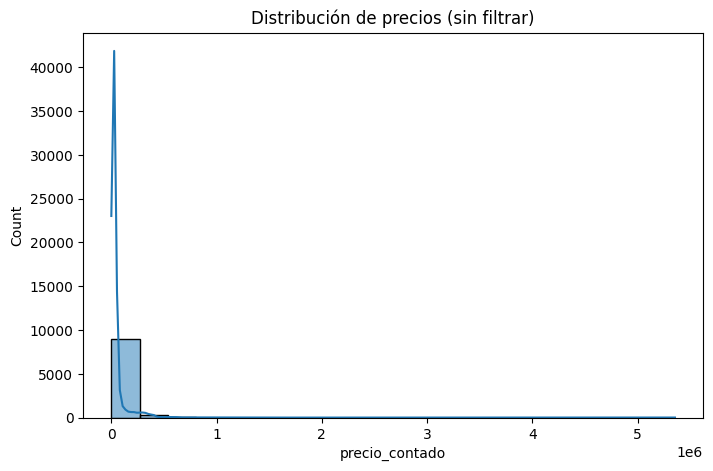

In [19]:
plt.figure(figsize=(8,5))
sns.histplot(df["precio_contado"], bins=20, kde=True)
plt.title("Distribución de precios (sin filtrar)")
plt.show()

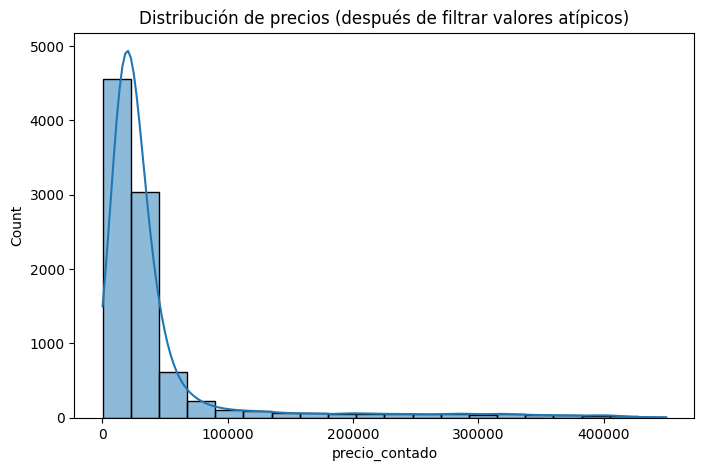

In [20]:
#Distribución de precios despues de eliminar los valores atipicos
plt.figure(figsize=(8,5))
sns.histplot(df_filtrado["precio_contado"], bins=20, kde=True)
plt.title("Distribución de precios (después de filtrar valores atípicos)")
plt.show()


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9249 entries, 0 to 9248
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   marca                           9249 non-null   object 
 1   modelo                          9249 non-null   object 
 2   precio_contado                  9249 non-null   float64
 3   financiacion_disponible         9249 non-null   int64  
 4   descuento                       9249 non-null   float64
 5   precio_final                    9249 non-null   float64
 6   ubicacion                       9249 non-null   object 
 7   kilometraje                     9249 non-null   float64
 8   combustible_Diésel              9249 non-null   bool   
 9   combustible_Eléctrico           9249 non-null   bool   
 10  combustible_Gas                 9249 non-null   bool   
 11  combustible_Gasolina            9249 non-null   bool   
 12  combustible_Híbrido             92

## Relación Antigüedad y Precio ##

C:\Users\irina\AppData\Local\Temp\ipykernel_8464\569390817.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado.loc[:, "antiguedad"] = 2025 - df_filtrado["año_matriculacion2"]


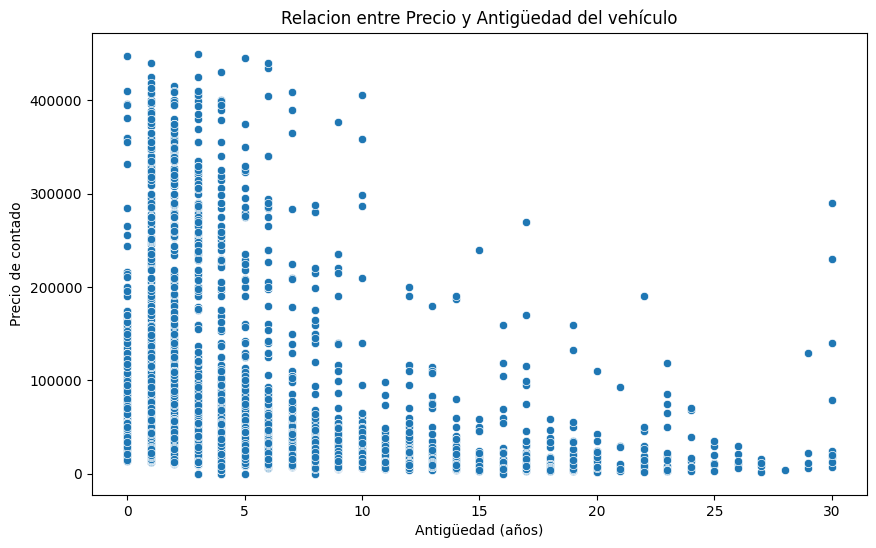

In [22]:
# Asegurarse de que la columna 'antiguedad' existe en df_filtrado
df_filtrado.loc[:, "antiguedad"] = 2025 - df_filtrado["año_matriculacion2"]

# Graficar precio/Antigüedad : mostrar si existe una relación entre el precio y la antigüedad del vehículo
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_filtrado, x="antiguedad", y="precio_contado")
plt.title("Relacion entre Precio y Antigüedad del vehículo")
plt.xlabel("Antigüedad (años)")
plt.ylabel("Precio de contado")
plt.show()


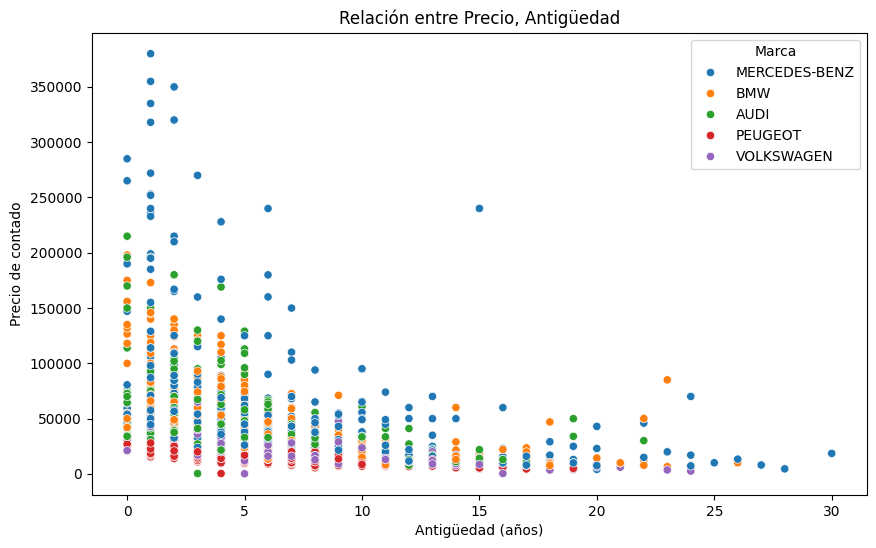

In [23]:

marcas_top5 = df_filtrado["marca"].value_counts().index[:5]

df_filtrado_marcas = df_filtrado[df_filtrado["marca"].isin(marcas_top5)]
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_filtrado_marcas, x="antiguedad", y="precio_contado", hue="marca", palette="tab10")
plt.title("Relación entre Precio, Antigüedad")
plt.xlabel("Antigüedad (años)")
plt.ylabel("Precio de contado")
plt.legend(title="Marca")
plt.show()



In [24]:
#Coeficiente de Correlacion de Pearson
correlacion = df_filtrado[["antiguedad", "precio_contado"]].corr()
print(correlacion)

                antiguedad  precio_contado
antiguedad        1.000000       -0.213382
precio_contado   -0.213382        1.000000


## Graf1-Relación Garantía vs Precio ##

In [25]:
#modelos_top5 = df["marca"].value_counts().index[:5]
#df_filtrado_modelos = df[df["marca"].isin(modelos_top5)]
#df_filtrado_modelos.loc[:, "garantia_rango"] = pd.cut(df_filtrado_modelos["garantia_limpia"], bins=[0, 6, 12, 24, 36, 60], labels=["0-6", "6-12", "12-24", "24-36", "36-60"])
#plt.figure(figsize=(10,6))
#sns.scatterplot(data=df_filtrado_modelos, x="garantia_limpia", y="precio_contado", hue="marca", palette="tab10", alpha=0.6)
#sns.regplot(data=df_filtrado_modelos, x="garantia_limpia", y="precio_contado", scatter=False, line_kws={"color": "red"})
#sns.boxplot(data=df_filtrado_modelos, x="garantia_rango", y="precio_contado")
#plt.ylim(0, 800000)
#plt.title("Relación entre garantía, precio según su marca")
#plt.xlabel("Garantía (meses)")
#plt.ylabel("Precio de contado")
#plt.legend(title="Marca")
#plt.show()


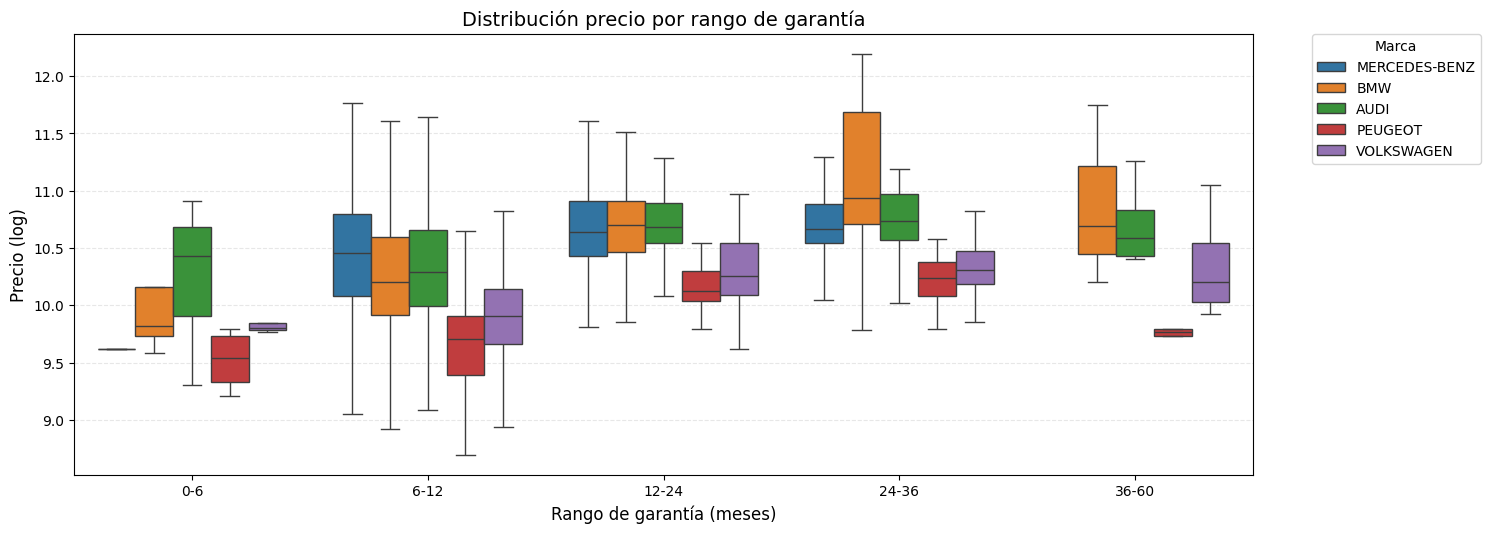

In [26]:
modelos_top5 = df["marca"].value_counts().index[:5]
df_filtrado_modelos = df[df["marca"].isin(modelos_top5)].copy()

# 2. Aplicar transformación logarítmica al precio
df_filtrado_modelos["precio_log"] = np.log1p(df_filtrado_modelos["precio_contado"])

# 3. Crear rangos de garantía
df_filtrado_modelos["garantia_rango"] = pd.cut(
    df_filtrado_modelos["garantia_limpia"],
    bins=[0, 6, 12, 24, 36, 60],
    labels=["0-6", "6-12", "12-24", "24-36", "36-60"]
)

plt.figure(figsize=(15, 10))
plt.subplot(2, 1, 2)  # 2 filas, 1 columna, posición 2
boxplot = sns.boxplot(
    data=df_filtrado_modelos,
    x="garantia_rango",
    y="precio_log",
    hue="marca",
    palette="tab10",
    showfliers=False
)
plt.title("Distribución precio por rango de garantía", fontsize=14)
plt.xlabel("Rango de garantía (meses)", fontsize=12)
plt.ylabel("Precio (log)", fontsize=12)
plt.grid(True, axis='y', linestyle='--', alpha=0.3)

# Mover la leyenda a una posición adecuada y ajustar su tamaño
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., title='Marca')

plt.tight_layout()
plt.show()

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9249 entries, 0 to 9248
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   marca                           9249 non-null   object 
 1   modelo                          9249 non-null   object 
 2   precio_contado                  9249 non-null   float64
 3   financiacion_disponible         9249 non-null   int64  
 4   descuento                       9249 non-null   float64
 5   precio_final                    9249 non-null   float64
 6   ubicacion                       9249 non-null   object 
 7   kilometraje                     9249 non-null   float64
 8   combustible_Diésel              9249 non-null   bool   
 9   combustible_Eléctrico           9249 non-null   bool   
 10  combustible_Gas                 9249 non-null   bool   
 11  combustible_Gasolina            9249 non-null   bool   
 12  combustible_Híbrido             92

In [28]:
# Calcular el promedio de precio dentro de cada grupo de garantía
promedios_garantia = df.groupby("garantia_rango", observed=True)["precio_contado"].mean()
print(promedios_garantia)


KeyError: 'garantia_rango'

## Gráfico 2- precio final vs kilometraje por tipo de transmisión ##

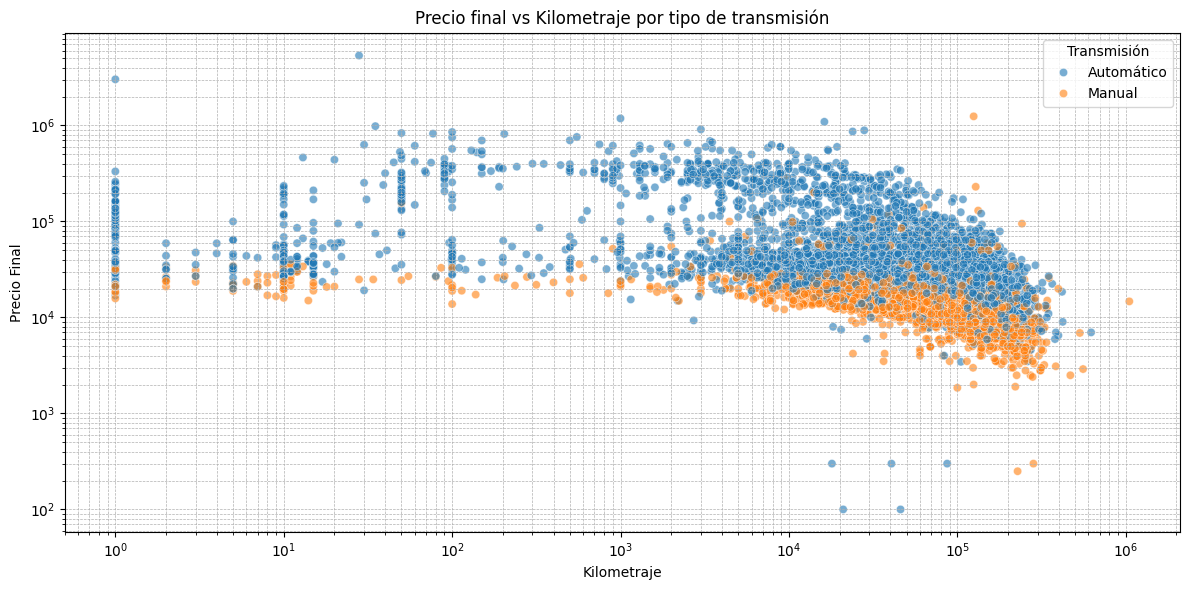

In [ ]:
# graficar precio final vs kilometraje por tipo de transmisión
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x="kilometraje", y="precio_contado", hue="transmision", alpha=0.6)
plt.xscale("log")
plt.yscale("log")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.title('Precio final vs Kilometraje por tipo de transmisión')
plt.xlabel('Kilometraje')
plt.ylabel('Precio Final')
plt.legend(title='Transmisión', loc='best')
plt.tight_layout()
plt.show()

In [ ]:
df.head(2)

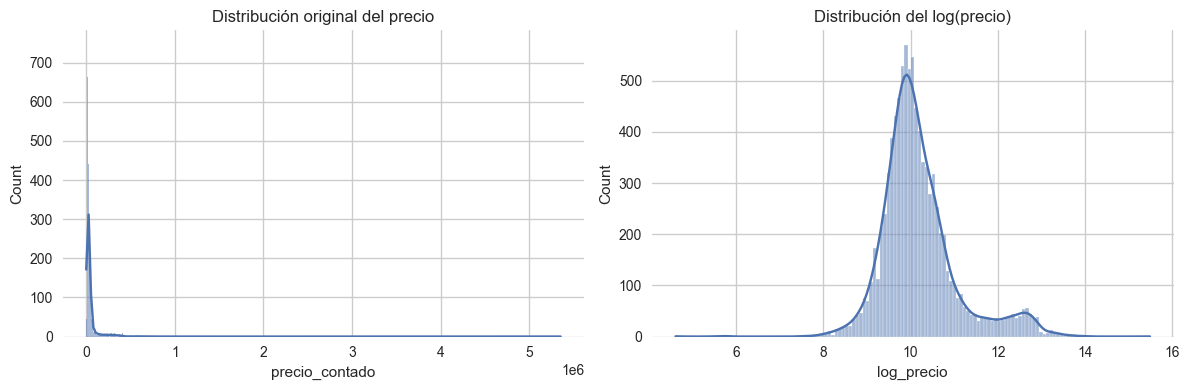

In [ ]:
# Antes de la transformación
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.histplot(df['precio_contado'], kde=True)
plt.title('Distribución original del precio')

# Después de la transformación
plt.subplot(1, 2, 2)
sns.histplot(df['log_precio'], kde=True)
plt.title('Distribución del log(precio)')
plt.tight_layout()
plt.show()

In [ ]:
df.head(10)

NameError: name 'df' is not defined

## Comparador de coches ##

Columnas disponibles en tu DataFrame:
['marca', 'modelo', 'precio_contado', 'financiacion_disponible', 'descuento', 'precio_final', 'ubicacion', 'kilometraje', 'combustible_Diésel', 'combustible_Eléctrico', 'combustible_Gas', 'combustible_Gasolina', 'combustible_Híbrido', 'combustible_Híbrido Enchufable', 'combustible_nan', 'es_km0', 'es_demo', 'transmision', 'tipo_carroceria', 'asientos', 'potencia', 'puertas', 'mes_matriculacion2', 'año_matriculacion2', 'garantia_limpia', 'transmision_cod', 'id_registro', 'timestamp_extraccion']

Características que usaremos: ['precio_final', 'kilometraje', 'potencia', 'garantia_limpia', 'puertas']

Índices disponibles: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 8

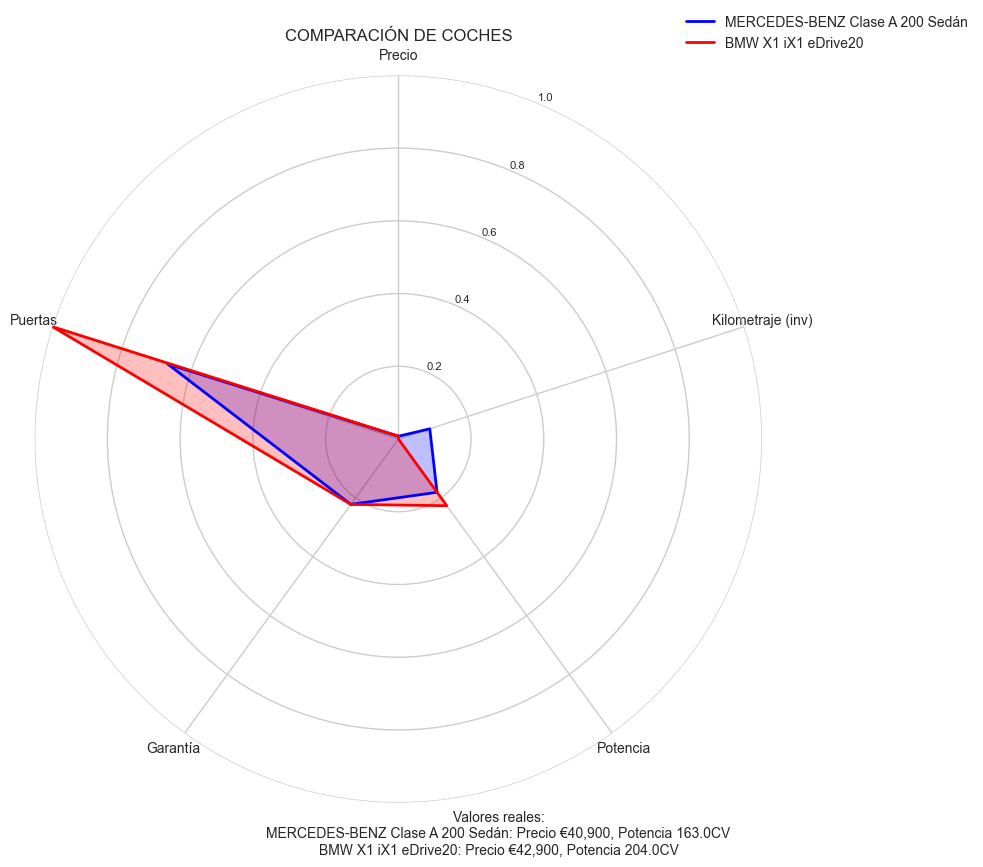

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# 1. Verificación de datos
print("Columnas disponibles en tu DataFrame:")
print(df.columns.tolist())

# 2. Selección de características con verificación
possible_features = {
    'precio': 'precio_final',
    'kilometros': 'kilometraje',
    'potencia': 'potencia',
    'garantia': 'garantia_limpia',
    'puertas': 'puertas'
}

# Creamos lista de características disponibles
available_features = []
feature_names = []
for name, col in possible_features.items():
    if col in df.columns:
        available_features.append(col)
        feature_names.append(name)

print("\nCaracterísticas que usaremos:", available_features)

# 3. Función de normalización mejorada
def normalize_data(df, features):
    df_norm = df.copy()
    
    # Manejo especial para kilometraje
    if 'kilometraje' in features:
        df_norm['kilometraje_inv'] = 1 / (1 + df_norm['kilometraje'])
        features = ['kilometraje_inv' if f == 'kilometraje' else f for f in features]
    
    # Escalado MinMax
    scaler = MinMaxScaler()
    df_normalized = pd.DataFrame(
        scaler.fit_transform(df_norm[features]),
        columns=features
    )
    
    return df_normalized, features

# 4. Normalización
df_normalized, used_features = normalize_data(df, available_features)

# 5. Función de comparación robusta
def compare_cars(car1_index, car2_index):
    try:
        car1 = df.iloc[car1_index]
        car2 = df.iloc[car2_index]
    except IndexError:
        print(f"Error: Índices deben estar entre 0 y {len(df)-1}")
        return
    
    # Nombres de los coches (con manejo de errores)
    car1_name = f"Coche {car1_index}"
    car2_name = f"Coche {car2_index}"
    
    if 'marca' in df.columns and 'modelo' in df.columns:
        car1_name = f"{car1.get('marca', '')} {car1.get('modelo', '')}".strip()
        car2_name = f"{car2.get('marca', '')} {car2.get('modelo', '')}".strip()
    elif 'marca' in df.columns:
        car1_name = str(car1.get('marca', ''))
        car2_name = str(car2.get('marca', ''))
    
    # Configuración del gráfico
    label_map = {
        'precio_final': 'Precio',
        'kilometraje_inv': 'Kilometraje (inv)',
        'potencia': 'Potencia',
        'garantia_limpia': 'Garantía',
        'puertas': 'Puertas'
    }
    
    labels = [label_map.get(f, f) for f in used_features]
    angles = np.linspace(0, 2*np.pi, len(labels), endpoint=False).tolist()
    angles += angles[:1]
    
    fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))
    
    # Datos coche 1
    values = df_normalized.iloc[car1_index][used_features].tolist()
    values += values[:1]
    ax.plot(angles, values, 'b-', linewidth=2, label=car1_name)
    ax.fill(angles, values, 'b', alpha=0.25)
    
    # Datos coche 2
    values = df_normalized.iloc[car2_index][used_features].tolist()
    values += values[:1]
    ax.plot(angles, values, 'r-', linewidth=2, label=car2_name)
    ax.fill(angles, values, 'r', alpha=0.25)
    
    # Personalización
    ax.set_theta_offset(np.pi/2)
    ax.set_theta_direction(-1)
    ax.set_thetagrids(np.degrees(angles[:-1]), labels)
    
    plt.yticks([0.2, 0.4, 0.6, 0.8, 1], size=8)
    plt.ylim(0, 1)
    plt.title(f"COMPARACIÓN DE COCHES")
    plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
    
    # Tabla de valores reales
    if 'precio_final' in df.columns:
        plt.figtext(0.5, 0.05, 
                   f"Valores reales:\n"
                   f"{car1_name}: Precio €{car1.get('precio_final', 'N/A'):,.0f}, "
                   f"Potencia {car1.get('potencia', 'N/A')}CV\n"
                   f"{car2_name}: Precio €{car2.get('precio_final', 'N/A'):,.0f}, "
                   f"Potencia {car2.get('potencia', 'N/A')}CV",
                   ha='center')
    
    plt.tight_layout()
    plt.show()

# 6. Ejemplo de uso
print("\nÍndices disponibles:", list(range(len(df))))
compare_cars(0, 1)  # Cambia estos índices según tus necesidades

## Relación entre precio y ubicación ##

In [ ]:
#ciudades_principales = ["Madrid", "Barcelona", "Sevilla", "Valencia", "Murcia", "Málaga", "Zaragoza", "Bilbao"]
#df_filtrado = df[df["ubicacion"].isin(ciudades_principales)]
#plt.figure(figsize=(14,6))
#sns.boxplot(data=df_filtrado, x="ubicacion", y="precio_contado")
#plt.title("Relación entre Precio y Ubicación del Vehículo")
#plt.xlabel("Ubicación")
#plt.ylabel("Precio de contado")
#plt.xticks(rotation=90)
#plt.show()

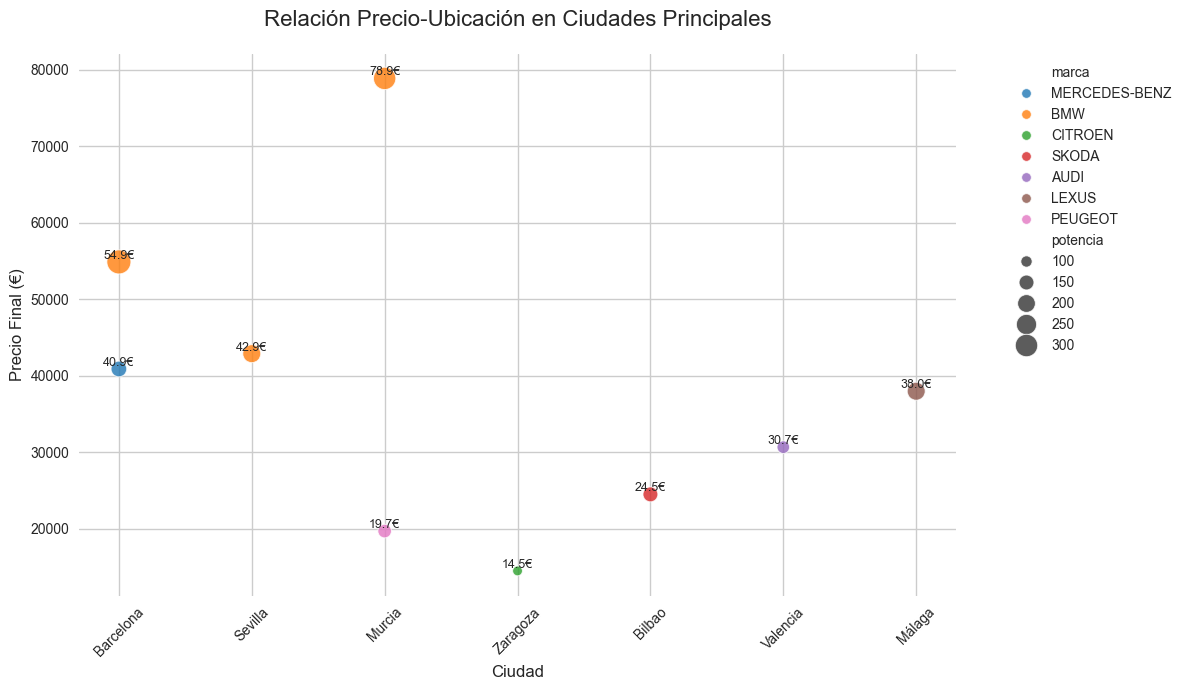

In [ ]:
data = {
    'marca': ['MERCEDES-BENZ', 'BMW', 'BMW', 'CITROEN', 'MERCEDES-BENZ', 'SKODA', 'AUDI', 'LEXUS', 'PEUGEOT', 'BMW'],
    'precio_final': [40900, 42900, 78900, 14490, 22293, 24500, 30674, 37990, 19700, 54900],
    'ubicacion': ['Barcelona', 'Sevilla', 'Murcia', 'Zaragoza', 'Madrid', 'Bilbao', 'Valencia', 'Málaga', 'Murcia', 'Barcelona'],
    'potencia': [163, 204, 298, 83, 95, 150, 116, 204, 130, 340],
}
df = pd.DataFrame(data)
ciudades_principales = ["Barcelona", "Sevilla", "Valencia", "Murcia", "Málaga", "Zaragoza", "Bilbao"]
df_filtrado = df[df['ubicacion'].isin(ciudades_principales)]
plt.figure(figsize=(12, 7))
sns.set_style("whitegrid")
scatter = sns.scatterplot(
    data=df_filtrado,
    x='ubicacion',
    y='precio_final',
    hue='marca', 
    size='potencia',
    sizes=(50, 300),
    palette='tab10',
    alpha=0.8
)
plt.title('Relación Precio-Ubicación en Ciudades Principales', fontsize=16, pad=20)
plt.xlabel('Ciudad', fontsize=12)
plt.ylabel('Precio Final (€)', fontsize=12)
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
for line in range(df_filtrado.shape[0]):
    scatter.text(
        df_filtrado['ubicacion'].iloc[line],
        df_filtrado['precio_final'].iloc[line],
        f"{df_filtrado['precio_final'].iloc[line]/1000:.1f}€",
        horizontalalignment='center',
        verticalalignment='bottom',
        fontsize=9
    )
plt.tight_layout()
plt.show()

In [ ]:
df.head(10)

,marca,modelo,precio_contado,financiacion_disponible,descuento,precio_final,ubicacion,kilometraje,combustible_Diésel,combustible_Eléctrico,...,tipo_carroceria,asientos,potencia,puertas,mes_matriculacion2,año_matriculacion2,garantia_limpia,transmision_cod,id_registro,timestamp_extraccion
0,MERCEDES-BENZ,Clase A 200 Sedán,40900.0,0,0.00,40900.0,Córdoba,10.0,False,False,...,Desconocido,5.0,163.0,4.0,1.0,2025.0,24,0,fe9e43d9-f8e9-491a-a550-8a11de545745,2025-06-09 19:22:10.122895
1,BMW,X1 iX1 eDrive20,42900.0,1,0.00,42900.0,León,5145.0,False,True,...,Todo Terreno,5.0,204.0,5.0,9.0,2024.0,24,0,abb05433-55b3-41e7-86d3-3467b02f24c5,2025-06-09 19:22:10.122895
2,BMW,X5 xDrive 30dA xLine,78900.0,1,0.00,78900.0,León,12356.0,True,False,...,Todo Terreno,5.0,298.0,5.0,5.0,2024.0,24,0,ab82e3fd-a3ec-40a5-b6be-9d3a9a7b6d9d,2025-06-09 19:22:10.122895
3,CITROEN,C3 PureTech 60KW (83CV) Max,14490.0,1,0.00,14490.0,Zaragoza,15730.0,False,False,...,Desconocido,0.0,83.0,5.0,3.0,2024.0,24,1,590296ff-c786-47f9-8526-f3b227e09326,2025-06-09 19:22:10.122895
4,MERCEDES-BENZ,Citan Tourer 110CDI Base,22293.0,1,0.00,22293.0,Barcelona,43191.0,True,False,...,Monovolumen,5.0,95.0,5.0,5.0,2023.0,36,1,88b18c86-279b-49fb-b3f3-3573dbb53873,2025-06-09 19:22:10.122895
5,SKODA,Octavia 2.0TDI Selection DSG 110kW,24500.0,1,0.00,24500.0,Pontevedra,108440.0,True,False,...,Berlina,5.0,150.0,5.0,9.0,2023.0,12,0,0df2c898-5542-4e27-aff0-cd264b191f36,2025-06-09 19:22:10.122895
6,AUDI,Q2 S LINE 30 TDI 85(116) KW(CV) 6 VEL.,31300.0,1,-0.02,30674.0,Murcia,15314.0,True,False,...,Desconocido,0.0,116.0,5.0,2.0,2024.0,12,1,5a337f19-9c67-4c31-b04b-9db708b11c65,2025-06-09 19:22:10.122895
7,LEXUS,UX 300e Business,37990.0,1,0.00,37990.0,Sevilla,3612.0,False,True,...,Todo Terreno,5.0,204.0,5.0,5.0,2024.0,24,0,b85c8ecd-580a-4dad-a9d9-0fb10f5dc445,2025-06-09 19:22:10.122895
8,PEUGEOT,308 SW 1.5 BlueHDi S&S Allure EAT8 130,19700.0,1,0.00,19700.0,Pontevedra,104965.0,True,False,...,Stationwagon,5.0,130.0,5.0,8.0,2022.0,12,0,520e8408-fe85-4594-8265-cbbca0e0782d,2025-06-09 19:22:10.122895
9,BMW,i5 eDrive40 250 kW (340 CV),54900.0,1,0.00,54900.0,León,227.0,False,True,...,Desconocido,0.0,218.0,4.0,3.0,2024.0,24,0,22f9b577-707c-441a-b412-397eaf81bef8,2025-06-09 19:22:10.122895


,marca,modelo,precio_final,ubicacion,kilometraje
0,MERCEDES-BENZ,Clase A 200 Sedán,40900.0,Córdoba,10.0
1,BMW,X1 iX1 eDrive20,42900.0,León,5145.0


## Mapa Coroplético ##

In [ ]:
df.head(1)

,marca,modelo,precio_contado,financiacion_disponible,descuento,precio_final,ubicacion,kilometraje,combustible_Diésel,combustible_Eléctrico,...,potencia,puertas,mes_matriculacion2,año_matriculacion2,garantia_limpia,transmision_cod,id_registro,timestamp_extraccion,precio_log,garantia_bins
0,MERCEDES-BENZ,Clase A 200 Sedán,40900.0,0,0.0,40900.0,Córdoba,10.0,False,False,...,163.0,4.0,1.0,2025.0,24,0,fe9e43d9-f8e9-491a-a550-8a11de545745,2025-06-09 19:22:10.122895,10.61891,"(21.6, 32.4]"


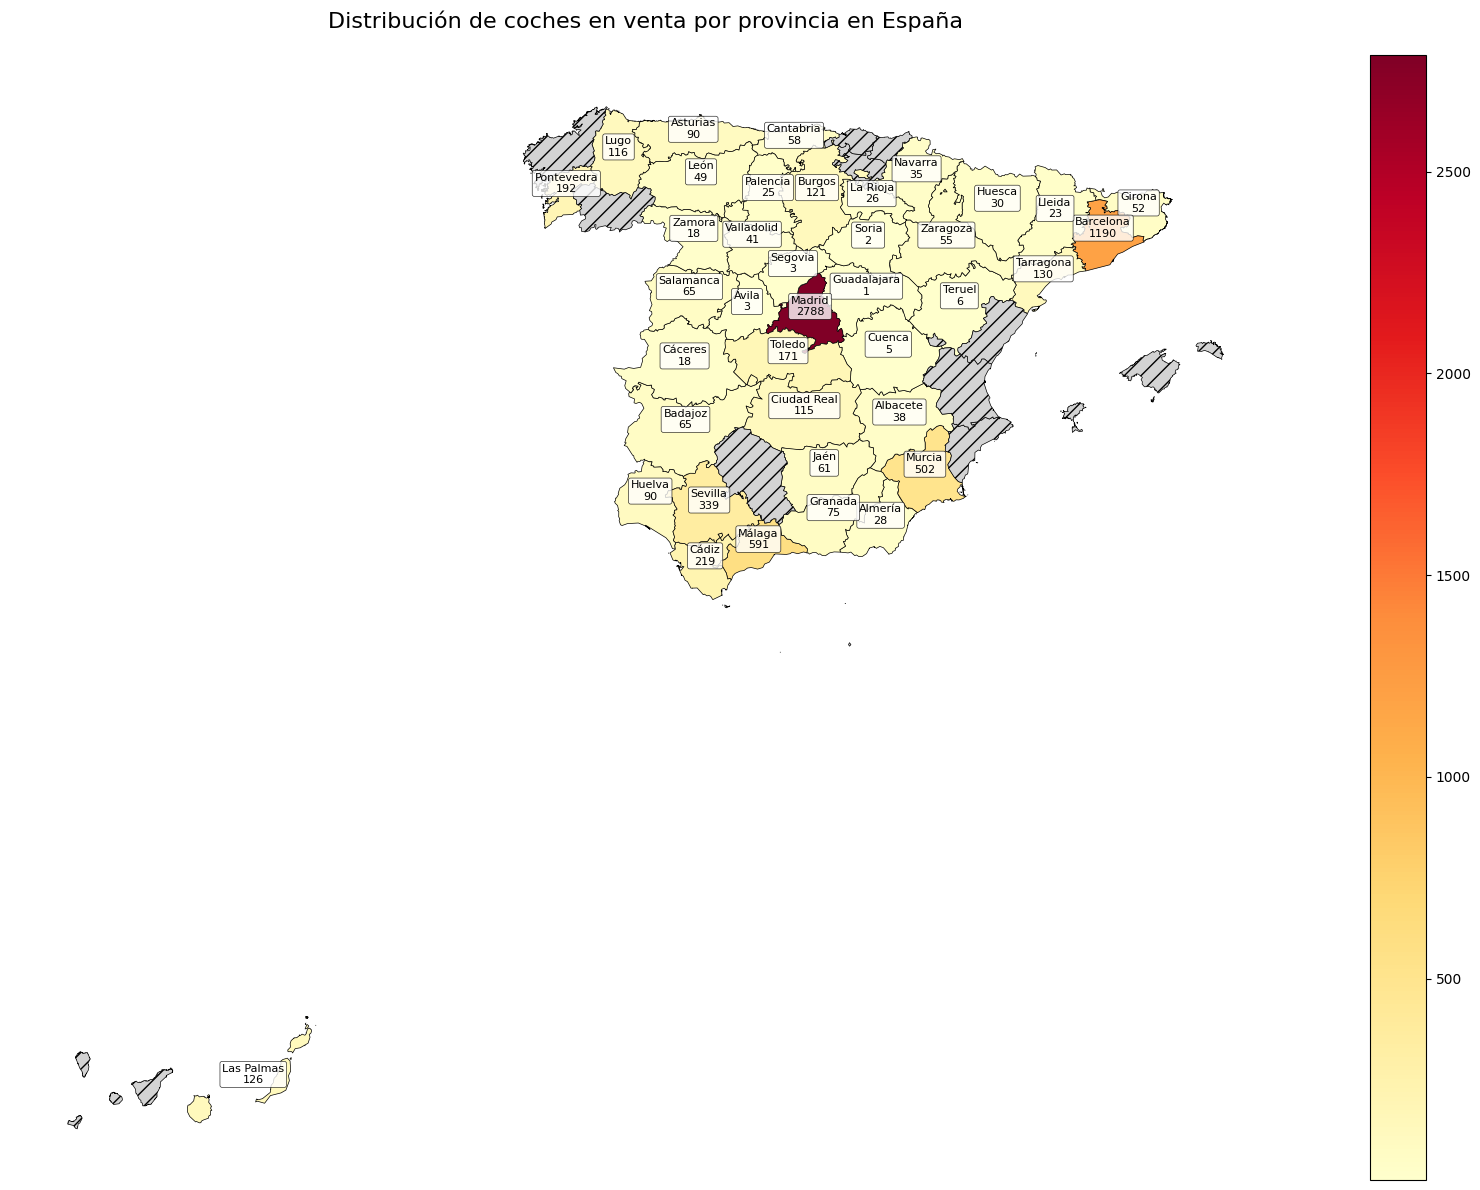

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

# 1. Contar coches por provincia
coches_por_provincia = df['ubicacion'].value_counts().reset_index()
coches_por_provincia.columns = ['provincia', 'cantidad']

# 2. Cargar GeoJSON de provincias españolas
url_geojson = "https://raw.githubusercontent.com/codeforgermany/click_that_hood/main/public/data/spain-provinces.geojson"
provincias_espana = gpd.read_file(url_geojson)

# 3. Normalizar nombres (ejemplo ajusta según tus datos)
normalizar_nombres = {
    "Córdoba": "Cordoba",
    "Coruña, A": "A Coruña",
    "Palmas, Las": "Las Palmas",
    "Valencia": "València"  # Ejemplo para comunidades bilingües
}
coches_por_provincia['provincia'] = coches_por_provincia['provincia'].replace(normalizar_nombres)

# 4. Unir datos con el GeoJSON
mapa_data = provincias_espana.merge(
    coches_por_provincia,
    left_on='name',
    right_on='provincia',
    how='left'
)

# 5. Configurar el mapa
fig, ax = plt.subplots(figsize=(18, 12))
cmap = 'YlOrRd'  # Escala de colores (amarillo-naranja-rojo)

# Mapa coroplético
mapa_data.plot(
    column='cantidad',
    cmap=cmap,
    linewidth=0.5,
    edgecolor='black',
    legend=True,
    ax=ax,
    missing_kwds={'color': 'lightgrey', 'hatch': '//', 'label': 'Sin datos'}
)

# 6. Añadir etiquetas con la cantidad de coches
for idx, row in mapa_data.iterrows():
    if not pd.isna(row['cantidad']):
        ax.annotate(
            text=f"{row['name']}\n{int(row['cantidad'])}",
            xy=row['geometry'].centroid.coords[0],
            ha='center',
            fontsize=8,
            bbox=dict(boxstyle="round,pad=0.2", fc="white", lw=0.5, alpha=0.8)
        )

# 8. Ajustes finales
plt.title('Distribución de coches en venta por provincia en España', fontsize=16, pad=20)
ax.set_axis_off()
plt.tight_layout()

# Guardar y mostrar
plt.savefig('mapa_coches_espana_detallado.png', dpi=300, bbox_inches='tight')
plt.show()

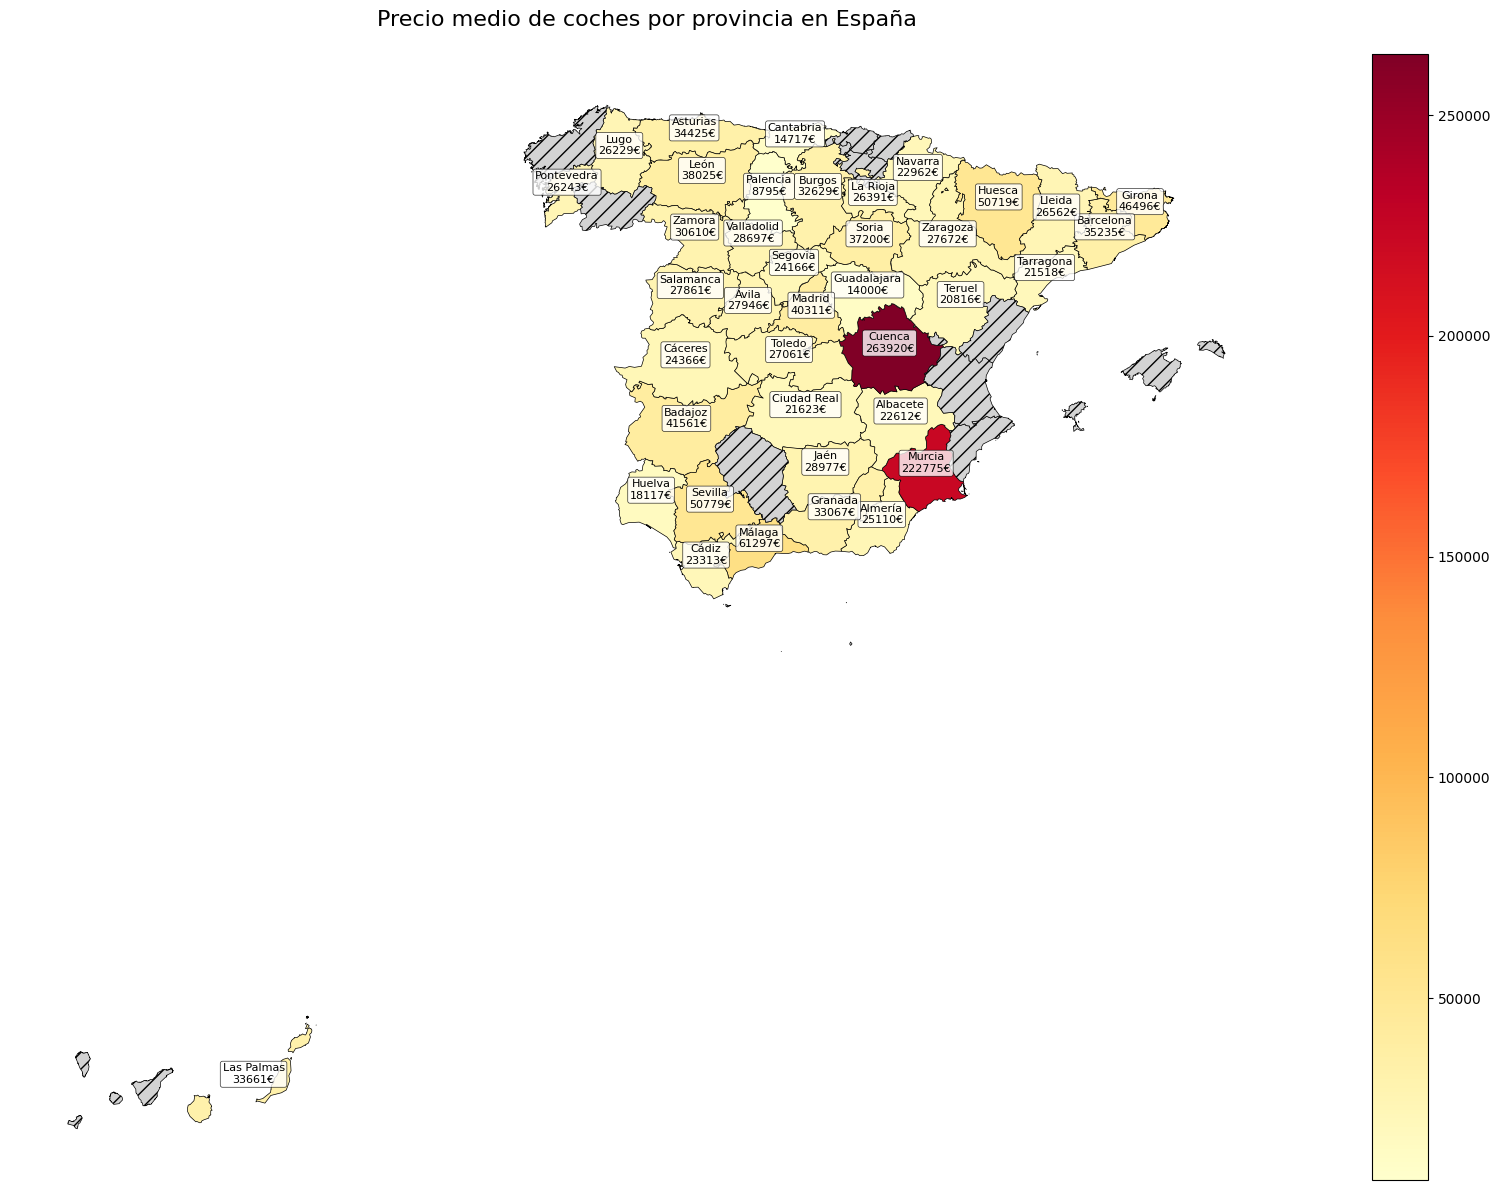

In [ ]:
# Graficar el mismo mapa coroplético pero mostrando la media de precios por provincia
# 1. Calcular precio medio por provincia
precio_medio_provincia = df.groupby('ubicacion')['precio_contado'].mean().reset_index()
precio_medio_provincia.columns = ['provincia', 'precio_medio']

# 2. Cargar GeoJSON de provincias españolas
url_geojson = "https://raw.githubusercontent.com/codeforgermany/click_that_hood/main/public/data/spain-provinces.geojson"
provincias_espana = gpd.read_file(url_geojson)

# 3. Normalizar nombres de provincias (ajustar según necesidad)
normalizar_nombres = {
    "Córdoba": "Cordoba",
    "Coruña, A": "A Coruña",
    "Palmas, Las": "Las Palmas",
    "Valencia": "València"
}
precio_medio_provincia['provincia'] = precio_medio_provincia['provincia'].replace(normalizar_nombres)

# 4. Unir datos con el GeoJSON
mapa_data = provincias_espana.merge(
    precio_medio_provincia,
    left_on='name',
    right_on='provincia',
    how='left'
)

# 5. Configurar el mapa
fig, ax = plt.subplots(figsize=(18, 12))
cmap = 'YlOrRd'  # Escala de colores

# Mapa coroplético
mapa_data.plot(
    column='precio_medio',
    cmap=cmap,
    linewidth=0.5,
    edgecolor='black',
    legend=True,
    ax=ax,
    missing_kwds={'color': 'lightgrey', 'hatch': '//', 'label': 'Sin datos'}
)
# 6. Añadir etiquetas con el precio medio
for idx, row in mapa_data.iterrows():
    if not pd.isna(row['precio_medio']):
        ax.annotate(
            text=f"{row['name']}\n{int(row['precio_medio'])}€",
            xy=row['geometry'].centroid.coords[0],
            ha='center',
            fontsize=8,
            bbox=dict(boxstyle="round,pad=0.2", fc="white", lw=0.5, alpha=0.8)
        )
plt.title('Precio medio de coches por provincia en España', fontsize=16, pad=20)
ax.set_axis_off()
plt.tight_layout()

# Guardar y mostrar
plt.savefig('mapa_precio_medio_espana.png', dpi=300, bbox_inches='tight')
plt.show()